# VGGtest

In [1]:
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras import applications
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datasetpath = r'C:\Users\SurfacePro4\Desktop\dataset'
batch_size = 32
img_size = 128
vggmodel = applications.VGG16(include_top=False, weights='imagenet')

vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.2)

Using TensorFlow backend.


In [2]:
train_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\training',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)  

val_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.


In [3]:
# #extract features from train_generator (take quite long time)
# X_train = vggmodel.predict_generator(train_generator, len(train_generator))

# #save X_train (so we don't need to extract again)
# filename = 'cnn_features_training(i64b16)'
# with open(filename, 'wb') as f:
#           np.save(f, X_train)

In [4]:
# #extract features from val set
# X_val = vggmodel.predict_generator(val_generator, len(val_generator))
# filename = 'cnn_features_validation(i64b16)'
# with open(filename, 'wb') as f:
#           np.save(f, X_val)

**If you already have cnn_features_training/valid files, you can skip extraction cells (2 cells above)

In [5]:
from keras.utils.np_utils import to_categorical
num_classes = len(train_generator.class_indices)
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(val_generator.filenames)

with open(r'extracted features\cnn_features_training(i128b32)', 'rb') as f:
    X_train = np.load(f)
Y_train = train_generator.classes
Y_train = to_categorical(Y_train, num_classes=num_classes)

with open(r'extracted features\cnn_features_validation(i128b32)', 'rb') as f:
    X_val = np.load(f)
Y_val = val_generator.classes
Y_val = to_categorical(Y_val, num_classes=num_classes)

In [9]:
Histories = {}
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

runsets = [(64,3),(128,3),(256,3)]
for (n_neurons,layers) in runsets:
    for i in range(1,layers+1):
        for d in [0,0.25,0.5]:
            #top model
            model = Sequential()
            model.add(Flatten(input_shape=X_train.shape[1:]))
            for j in range(i):
                model.add(Dense(n_neurons, activation='relu'))
                model.add(Dropout(d))
            model.add(Dense(num_classes, activation='softmax'))
            model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

            name=str(n_neurons)+'x'+str(i)+'layers+dropout('+str(d)+')'
            print("Model: "+name)
            History = model.fit(X_train, 
                                Y_train,
                                epochs=25,
                                batch_size=batch_size,
                                validation_data=(X_val, Y_val)
#                                 callbacks=[early_stopping]
                                )
            Histories[name]=History.history

Model: 64x1layers+dropout(0)
Train on 2197 samples, validate on 612 samples
Epoch 1/25
2197/2197 [==============================] - 2s 1ms/step - loss: 5.5952 - acc: 0.6022 - val_loss: 3.3149 - val_acc: 0.7386
Epoch 2/25
2197/2197 [==============================] - 1s 355us/step - loss: 1.9268 - acc: 0.8316 - val_loss: 1.6319 - val_acc: 0.8170
Epoch 3/25
2197/2197 [==============================] - 1s 372us/step - loss: 0.8370 - acc: 0.8817 - val_loss: 0.6428 - val_acc: 0.8186
Epoch 4/25
2197/2197 [==============================] - 1s 365us/step - loss: 0.3052 - acc: 0.9317 - val_loss: 0.8332 - val_acc: 0.8399
Epoch 5/25
2197/2197 [==============================] - 1s 368us/step - loss: 0.1518 - acc: 0.9645 - val_loss: 0.7246 - val_acc: 0.8448
Epoch 6/25
2197/2197 [==============================] - 1s 357us/step - loss: 0.0762 - acc: 0.9868 - val_loss: 0.6113 - val_acc: 0.8709
Epoch 7/25
2197/2197 [==============================] - 1s 380us/step - loss: 0.0432 - acc: 0.9932 - val_loss:

2197/2197 [==============================] - ETA: 0s - loss: 0.4304 - acc: 0.839 - 1s 366us/step - loss: 0.4368 - acc: 0.8343 - val_loss: 0.5693 - val_acc: 0.8546
Epoch 10/25
2197/2197 [==============================] - 1s 343us/step - loss: 0.4093 - acc: 0.8498 - val_loss: 0.7017 - val_acc: 0.8464
Epoch 11/25
2197/2197 [==============================] - 1s 387us/step - loss: 0.3741 - acc: 0.8721 - val_loss: 0.6004 - val_acc: 0.8660
Epoch 12/25
2197/2197 [==============================] - 1s 393us/step - loss: 0.3833 - acc: 0.8625 - val_loss: 0.6727 - val_acc: 0.8382
Epoch 13/25
2197/2197 [==============================] - 1s 377us/step - loss: 0.3817 - acc: 0.8680 - val_loss: 0.5485 - val_acc: 0.8562
Epoch 14/25
2197/2197 [==============================] - 1s 354us/step - loss: 0.3916 - acc: 0.8707 - val_loss: 0.6089 - val_acc: 0.8611
Epoch 15/25
2197/2197 [==============================] - 1s 361us/step - loss: 0.3143 - acc: 0.8807 - val_loss: 0.5564 - val_acc: 0.8791
Epoch 16/25
219

2197/2197 [==============================] - 1s 345us/step - loss: 0.2067 - acc: 0.9285 - val_loss: 0.8999 - val_acc: 0.8529
Epoch 18/25
2197/2197 [==============================] - 1s 340us/step - loss: 0.2313 - acc: 0.9308 - val_loss: 1.0045 - val_acc: 0.8611
Epoch 19/25
2197/2197 [==============================] - 1s 343us/step - loss: 0.2156 - acc: 0.9258 - val_loss: 0.9203 - val_acc: 0.8513
Epoch 20/25
2197/2197 [==============================] - 1s 342us/step - loss: 0.2529 - acc: 0.9304 - val_loss: 0.8026 - val_acc: 0.8546
Epoch 21/25
2197/2197 [==============================] - 1s 340us/step - loss: 0.1672 - acc: 0.9363 - val_loss: 0.8484 - val_acc: 0.8709
Epoch 22/25
2197/2197 [==============================] - 1s 341us/step - loss: 0.2267 - acc: 0.9276 - val_loss: 0.7643 - val_acc: 0.8693
Epoch 23/25
2197/2197 [==============================] - 1s 344us/step - loss: 0.1762 - acc: 0.9417 - val_loss: 0.9874 - val_acc: 0.8529
Epoch 24/25
2197/2197 [==============================

2197/2197 [==============================] - 1s 416us/step - loss: 5.5459e-05 - acc: 1.0000 - val_loss: 0.9236 - val_acc: 0.8693
Model: 64x3layers+dropout(0.25)
Train on 2197 samples, validate on 612 samples
Epoch 1/25
2197/2197 [==============================] - 3s 1ms/step - loss: 2.7174 - acc: 0.5089 - val_loss: 0.8289 - val_acc: 0.7222
Epoch 2/25
2197/2197 [==============================] - 1s 430us/step - loss: 1.0964 - acc: 0.6559 - val_loss: 0.6888 - val_acc: 0.7680
Epoch 3/25
2197/2197 [==============================] - 1s 449us/step - loss: 0.8423 - acc: 0.7264 - val_loss: 0.7477 - val_acc: 0.7614
Epoch 4/25
2197/2197 [==============================] - 1s 441us/step - loss: 0.6631 - acc: 0.7770 - val_loss: 0.5744 - val_acc: 0.8252
Epoch 5/25
2197/2197 [==============================] - 1s 447us/step - loss: 0.5284 - acc: 0.8207 - val_loss: 0.5495 - val_acc: 0.7958
Epoch 6/25
2197/2197 [==============================] - 1s 456us/step - loss: 0.4580 - acc: 0.8512 - val_loss: 0.6

2197/2197 [==============================] - 1s 574us/step - loss: 1.1165 - acc: 0.9235 - val_loss: 2.1609 - val_acc: 0.8529
Epoch 9/25
2197/2197 [==============================] - 1s 556us/step - loss: 0.9749 - acc: 0.9326 - val_loss: 1.9962 - val_acc: 0.8595
Epoch 10/25
2197/2197 [==============================] - 1s 576us/step - loss: 0.8697 - acc: 0.9395 - val_loss: 2.4562 - val_acc: 0.8284
Epoch 11/25
2197/2197 [==============================] - 1s 561us/step - loss: 0.9478 - acc: 0.9335 - val_loss: 1.9030 - val_acc: 0.8709
Epoch 12/25
2197/2197 [==============================] - 1s 561us/step - loss: 0.7066 - acc: 0.9522 - val_loss: 1.9525 - val_acc: 0.8513
Epoch 13/25
2197/2197 [==============================] - 1s 569us/step - loss: 0.6858 - acc: 0.9504 - val_loss: 2.4652 - val_acc: 0.8366
Epoch 14/25
2197/2197 [==============================] - 1s 563us/step - loss: 1.0164 - acc: 0.9299 - val_loss: 2.1099 - val_acc: 0.8578
Epoch 15/25
2197/2197 [==============================]

2197/2197 [==============================] - 1s 576us/step - loss: 1.1978 - acc: 0.9158 - val_loss: 2.0770 - val_acc: 0.8562
Epoch 17/25
2197/2197 [==============================] - 1s 576us/step - loss: 1.2868 - acc: 0.9094 - val_loss: 2.0104 - val_acc: 0.8627
Epoch 18/25
2197/2197 [==============================] - 1s 577us/step - loss: 1.2362 - acc: 0.9153 - val_loss: 1.8338 - val_acc: 0.8807
Epoch 19/25
2197/2197 [==============================] - 1s 570us/step - loss: 1.0985 - acc: 0.9226 - val_loss: 1.8690 - val_acc: 0.8725
Epoch 20/25
2197/2197 [==============================] - 1s 576us/step - loss: 1.1255 - acc: 0.9217 - val_loss: 1.7928 - val_acc: 0.8742
Epoch 21/25
2197/2197 [==============================] - 1s 568us/step - loss: 0.9930 - acc: 0.9326 - val_loss: 1.8911 - val_acc: 0.8676
Epoch 22/25
2197/2197 [==============================] - 1s 586us/step - loss: 1.1031 - acc: 0.9244 - val_loss: 1.6709 - val_acc: 0.8791
Epoch 23/25
2197/2197 [==============================

Epoch 25/25
2197/2197 [==============================] - 1s 576us/step - loss: 0.1836 - acc: 0.9727 - val_loss: 1.1397 - val_acc: 0.8725
Model: 128x2layers+dropout(0.5)
Train on 2197 samples, validate on 612 samples
Epoch 1/25
2197/2197 [==============================] - 3s 2ms/step - loss: 7.7858 - acc: 0.4675 - val_loss: 4.3052 - val_acc: 0.7157
Epoch 2/25
2197/2197 [==============================] - 1s 565us/step - loss: 5.4977 - acc: 0.6286 - val_loss: 3.4271 - val_acc: 0.7533
Epoch 3/25
2197/2197 [==============================] - 1s 587us/step - loss: 4.7898 - acc: 0.6741 - val_loss: 3.5684 - val_acc: 0.7549
Epoch 4/25
2197/2197 [==============================] - 1s 663us/step - loss: 4.2549 - acc: 0.7132 - val_loss: 3.5771 - val_acc: 0.7614
Epoch 5/25
2197/2197 [==============================] - 2s 936us/step - loss: 3.4336 - acc: 0.7674 - val_loss: 2.9989 - val_acc: 0.8023
Epoch 6/25
2197/2197 [==============================] - 2s 948us/step - loss: 3.4792 - acc: 0.7697 - val_l

2197/2197 [==============================] - 1s 540us/step - loss: 0.2739 - acc: 0.9240 - val_loss: 0.5656 - val_acc: 0.8791
Epoch 9/25
2197/2197 [==============================] - ETA: 0s - loss: 0.2350 - acc: 0.933 - 1s 533us/step - loss: 0.2373 - acc: 0.9331 - val_loss: 0.4822 - val_acc: 0.8644
Epoch 10/25
2197/2197 [==============================] - 1s 537us/step - loss: 0.1835 - acc: 0.9436 - val_loss: 0.5409 - val_acc: 0.8709
Epoch 11/25
2197/2197 [==============================] - 1s 544us/step - loss: 0.1891 - acc: 0.9536 - val_loss: 0.5536 - val_acc: 0.8742
Epoch 12/25
2197/2197 [==============================] - 1s 540us/step - loss: 0.1747 - acc: 0.9531 - val_loss: 0.5614 - val_acc: 0.8856
Epoch 13/25
2197/2197 [==============================] - 1s 538us/step - loss: 0.1660 - acc: 0.9554 - val_loss: 0.5948 - val_acc: 0.8775
Epoch 14/25
2197/2197 [==============================] - 1s 534us/step - loss: 0.1337 - acc: 0.9586 - val_loss: 0.7816 - val_acc: 0.8676
Epoch 15/25
2197

2197/2197 [==============================] - 2s 792us/step - loss: 1.6700 - acc: 0.8894 - val_loss: 2.3824 - val_acc: 0.8382
Epoch 17/25
2197/2197 [==============================] - 2s 788us/step - loss: 1.4421 - acc: 0.9049 - val_loss: 2.3872 - val_acc: 0.8448
Epoch 18/25
2197/2197 [==============================] - 2s 789us/step - loss: 1.2933 - acc: 0.9172 - val_loss: 2.1165 - val_acc: 0.8611
Epoch 19/25
2197/2197 [==============================] - 2s 782us/step - loss: 1.4258 - acc: 0.9081 - val_loss: 2.0548 - val_acc: 0.8693
Epoch 20/25
2197/2197 [==============================] - 2s 785us/step - loss: 1.4288 - acc: 0.9085 - val_loss: 1.9284 - val_acc: 0.8742
Epoch 21/25
2197/2197 [==============================] - 2s 787us/step - loss: 1.2029 - acc: 0.9222 - val_loss: 2.1004 - val_acc: 0.8578
Epoch 22/25
2197/2197 [==============================] - 2s 789us/step - loss: 1.2965 - acc: 0.9167 - val_loss: 2.6499 - val_acc: 0.8317
Epoch 23/25
2197/2197 [==============================

Epoch 25/25
2197/2197 [==============================] - 2s 915us/step - loss: 1.8427 - acc: 0.8821 - val_loss: 2.4413 - val_acc: 0.8464
Model: 256x2layers+dropout(0)
Train on 2197 samples, validate on 612 samples
Epoch 1/25
2197/2197 [==============================] - 5s 2ms/step - loss: 6.7448 - acc: 0.5444 - val_loss: 6.5017 - val_acc: 0.5686
Epoch 2/25
2197/2197 [==============================] - 2s 1ms/step - loss: 5.9676 - acc: 0.6168 - val_loss: 6.5427 - val_acc: 0.5850
Epoch 3/25
2197/2197 [==============================] - 2s 830us/step - loss: 5.8068 - acc: 0.6281 - val_loss: 6.2729 - val_acc: 0.6029
Epoch 4/25
2197/2197 [==============================] - 2s 910us/step - loss: 5.7888 - acc: 0.6318 - val_loss: 6.1968 - val_acc: 0.6111
Epoch 5/25
2197/2197 [==============================] - 3s 1ms/step - loss: 5.6075 - acc: 0.6459 - val_loss: 6.6710 - val_acc: 0.5801
Epoch 6/25
2197/2197 [==============================] - 3s 1ms/step - loss: 5.5168 - acc: 0.6541 - val_loss: 6.5

2197/2197 [==============================] - 2s 851us/step - loss: 3.6890 - acc: 0.7647 - val_loss: 3.3303 - val_acc: 0.7876
Epoch 9/25
2197/2197 [==============================] - 2s 859us/step - loss: 3.7324 - acc: 0.7619 - val_loss: 3.7722 - val_acc: 0.7614
Epoch 10/25
2197/2197 [==============================] - 2s 1ms/step - loss: 3.4865 - acc: 0.7792 - val_loss: 2.7185 - val_acc: 0.8235
Epoch 11/25
2197/2197 [==============================] - 2s 975us/step - loss: 3.1568 - acc: 0.7988 - val_loss: 2.4017 - val_acc: 0.8497
Epoch 12/25
2197/2197 [==============================] - 2s 1ms/step - loss: 3.1764 - acc: 0.7984 - val_loss: 2.7957 - val_acc: 0.8203
Epoch 13/25
2197/2197 [==============================] - 3s 1ms/step - loss: 3.2106 - acc: 0.7947 - val_loss: 2.6589 - val_acc: 0.8301
Epoch 14/25
2197/2197 [==============================] - 2s 1ms/step - loss: 3.4552 - acc: 0.7811 - val_loss: 3.4293 - val_acc: 0.7843
Epoch 15/25
2197/2197 [==============================] - 2s 1m

2197/2197 [==============================] - 2s 984us/step - loss: 0.2136 - acc: 0.9718 - val_loss: 1.1190 - val_acc: 0.8611
Epoch 18/25
2197/2197 [==============================] - 2s 1ms/step - loss: 0.0984 - acc: 0.9827 - val_loss: 1.1686 - val_acc: 0.8644
Epoch 19/25
2197/2197 [==============================] - 2s 903us/step - loss: 0.1158 - acc: 0.9845 - val_loss: 1.1568 - val_acc: 0.8791
Epoch 20/25
2197/2197 [==============================] - 2s 911us/step - loss: 0.1564 - acc: 0.9832 - val_loss: 1.4209 - val_acc: 0.8578
Epoch 21/25
2197/2197 [==============================] - 2s 910us/step - loss: 0.1606 - acc: 0.9800 - val_loss: 1.2049 - val_acc: 0.8693
Epoch 22/25
2197/2197 [==============================] - 2s 965us/step - loss: 0.1738 - acc: 0.9754 - val_loss: 1.0871 - val_acc: 0.8791
Epoch 23/25
2197/2197 [==============================] - 3s 1ms/step - loss: 0.0720 - acc: 0.9900 - val_loss: 1.1804 - val_acc: 0.8644
Epoch 24/25
2197/2197 [==============================] - 

In [ ]:
#Save histories
# with open('runHistories', 'wb') as f:
#           np.save(f, Histories)
        
# import json
# json.dump(Histories, open('jsonHistory','w'))

In [ ]:
#Load histories (not working)
# with open('runHistories', 'rb') as f:
#     lHistories = np.load(f)
# type(Histories)==type(lHistories)

64x1layers+dropout(0)


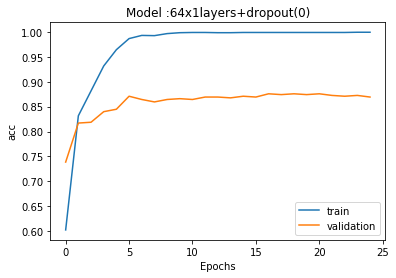

64x1layers+dropout(0.25)


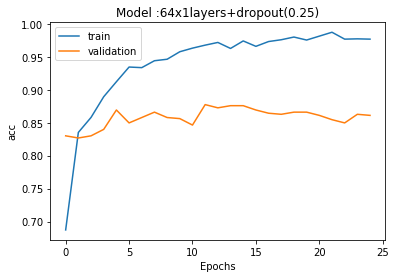

64x1layers+dropout(0.5)


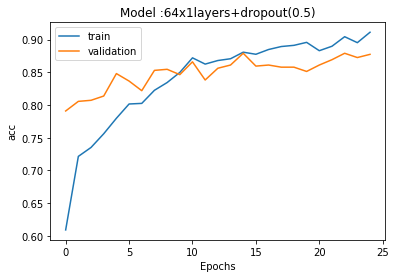

64x2layers+dropout(0)


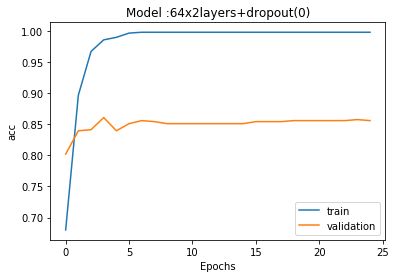

64x2layers+dropout(0.25)


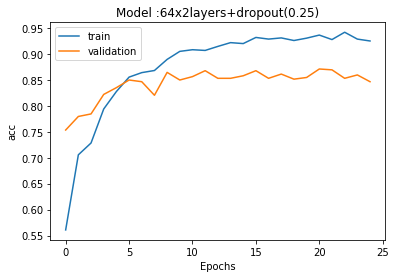

64x2layers+dropout(0.5)


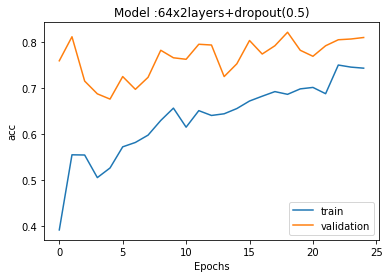

64x3layers+dropout(0)


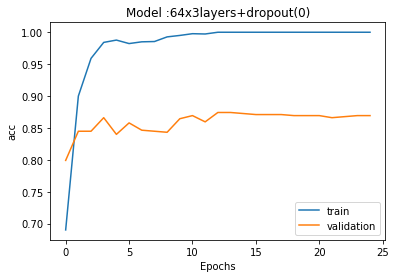

64x3layers+dropout(0.25)


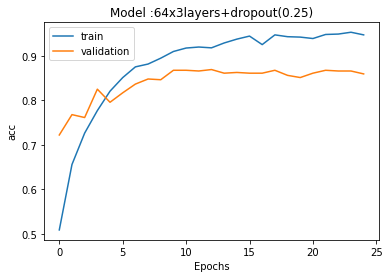

64x3layers+dropout(0.5)


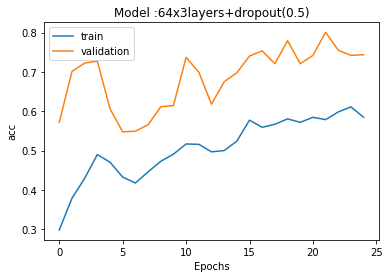

128x1layers+dropout(0)


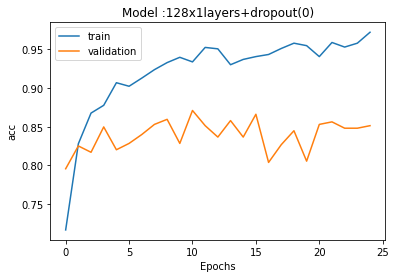

128x1layers+dropout(0.25)


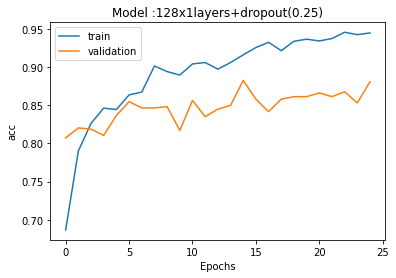

128x1layers+dropout(0.5)


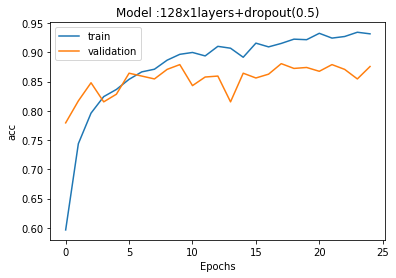

128x2layers+dropout(0)


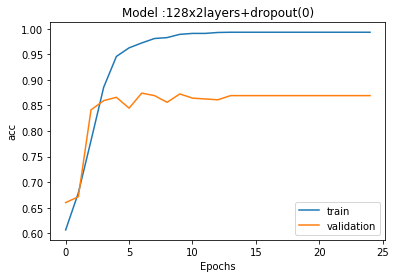

128x2layers+dropout(0.25)


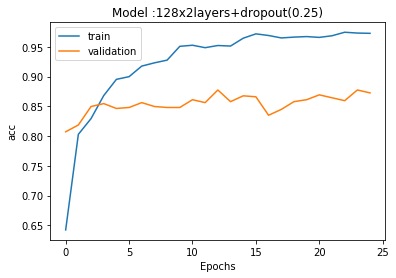

128x2layers+dropout(0.5)


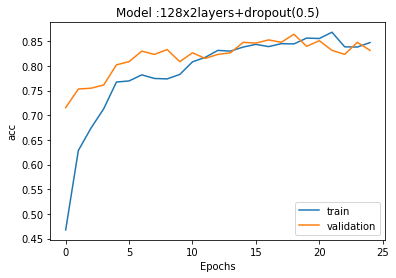

128x3layers+dropout(0)


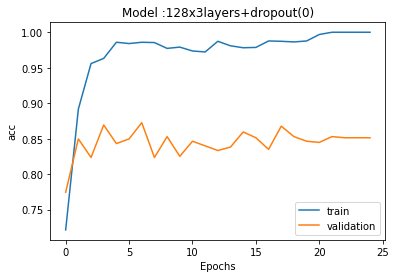

128x3layers+dropout(0.25)


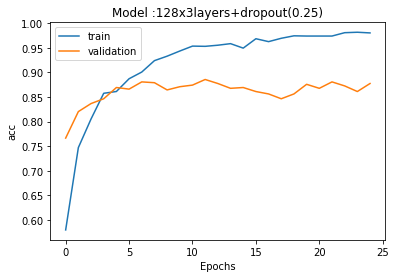

128x3layers+dropout(0.5)


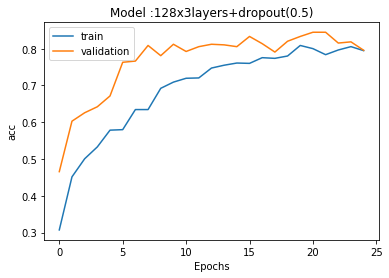

256x1layers+dropout(0)


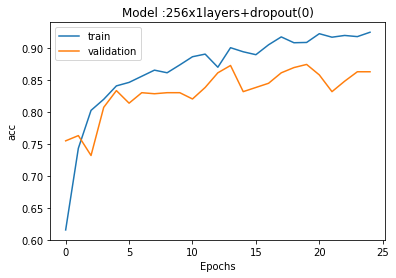

256x1layers+dropout(0.25)


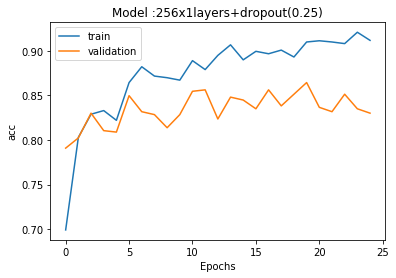

256x1layers+dropout(0.5)


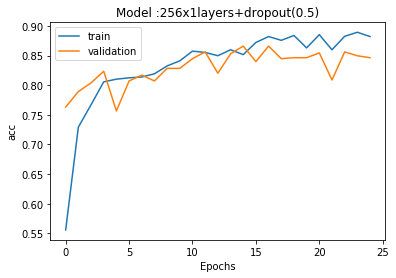

256x2layers+dropout(0)


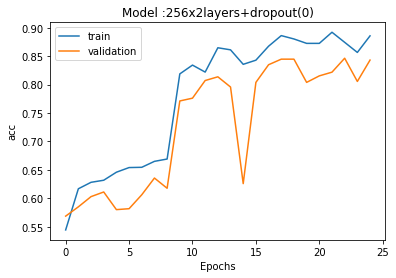

256x2layers+dropout(0.25)


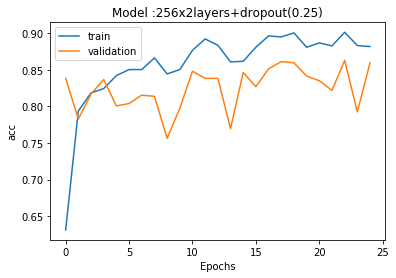

256x2layers+dropout(0.5)


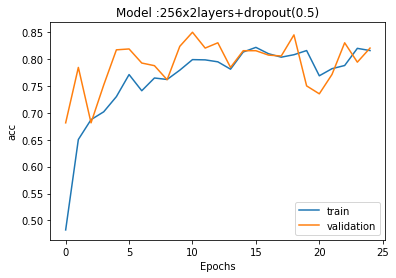

256x3layers+dropout(0)


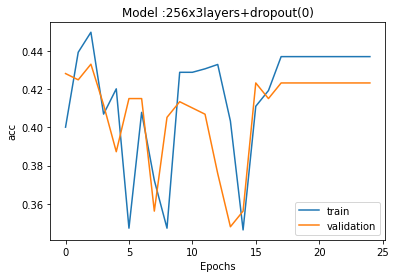

256x3layers+dropout(0.25)


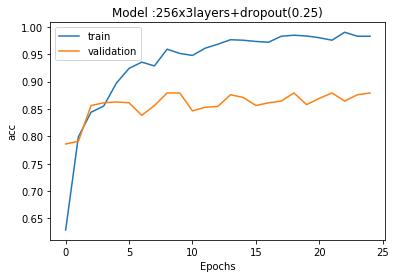

256x3layers+dropout(0.5)


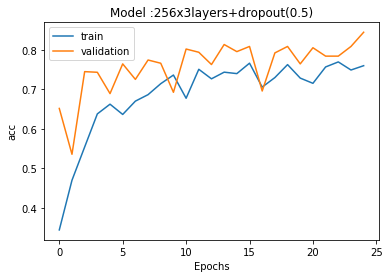

In [10]:
import matplotlib.pyplot as plt
def draw_graph(History, arg, name): #arg = acc|loss
    plt.tight_layout()
    plt.plot(History[arg])
    val_arg = 'val_' + arg
    plt.plot(History[val_arg])
    plt.title('Model :'+ name)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

for (n_neurons,layers) in runsets:
    for i in range(1,layers+1):
        for d in [0,0.25,0.5]:
            name=str(n_neurons)+'x'+str(i)+'layers+dropout('+str(d)+')'
            print(name)
            draw_graph(Histories[name],'acc',name)

# VGG on test set

In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [12]:
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras import applications
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datasetpath = r'C:\Users\SurfacePro4\Desktop\dataset'
batch_size = 32
img_size = 128

vggmodel = applications.VGG16(include_top=False, weights='imagenet')
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.2)

In [13]:
train_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\training',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)  

val_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\SurfacePro4\Desktop\pongAI\dataset\testing',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)  

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


In [ ]:
# X_test = vggmodel.predict_generator(test_generator, len(test_generator))
# filename = 'cnn_features_test(i128b32)'
# with open(filename, 'wb') as f:
#           np.save(f, X_test)

In [14]:
from keras.utils.np_utils import to_categorical
num_classes = len(train_generator.class_indices)
nb_train_samples = len(train_generator.filenames)
nb_val_samples = len(val_generator.filenames)
nb_test_samples = len(test_generator.filenames)

with open(r'extracted features\cnn_features_training(i128b32)', 'rb') as f:
    X_train = np.load(f)
Y_train = train_generator.classes
Y_train = to_categorical(Y_train, num_classes=num_classes)

with open('extracted features\cnn_features_validation(i128b32)', 'rb') as f:
    X_val = np.load(f)
Y_val = val_generator.classes
Y_val = to_categorical(Y_val, num_classes=num_classes)

with open('extracted features\cnn_features_test(i128b32)', 'rb') as f:
    X_test = np.load(f)
Y_test = test_generator.classes
Y_test = to_categorical(Y_test, num_classes=num_classes)

Model: 128 neurons x 3 Layers on 128x128 images 32 batch size

In [31]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

name=str(128)+'x'+str(3)+'layers'
print("Model: "+name)
History = model.fit(X_train, 
                    Y_train,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stopping]
                    )

Model: 128x3layers
Train on 2197 samples, validate on 612 samples
Epoch 1/20
2197/2197 [==============================] - 6s 3ms/step - loss: 3.7390 - acc: 0.5699 - val_loss: 1.5835 - val_acc: 0.7908
Epoch 2/20
2197/2197 [==============================] - 2s 969us/step - loss: 1.5295 - acc: 0.7442 - val_loss: 1.0671 - val_acc: 0.7843
Epoch 3/20
2197/2197 [==============================] - 2s 898us/step - loss: 0.9730 - acc: 0.7920 - val_loss: 0.6303 - val_acc: 0.8301
Epoch 4/20
2197/2197 [==============================] - 2s 867us/step - loss: 0.7434 - acc: 0.8366 - val_loss: 0.7960 - val_acc: 0.8219
Epoch 5/20
2197/2197 [==============================] - 2s 822us/step - loss: 0.5811 - acc: 0.8675 - val_loss: 0.6185 - val_acc: 0.8546
Epoch 6/20
2197/2197 [==============================] - 2s 903us/step - loss: 0.4367 - acc: 0.8858 - val_loss: 0.6179 - val_acc: 0.8676
Epoch 7/20
2197/2197 [==============================] - 2s 868us/step - loss: 0.3706 - acc: 0.9194 - val_loss: 0.8252 - 

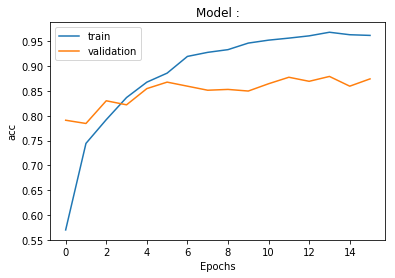

Confusion matrix, without normalization
309/309 [==============================] - 0s 211us/step
Accuracy: 85.76%
Loss: 0.8359560145722238


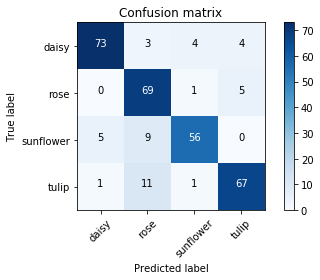

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np

draw_graph(History.history,'acc',"")
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, test_generator.class_indices)



loss, acc = model.evaluate(X_test, Y_test)
print("Accuracy: {:.2f}%".format(acc * 100))
print("Loss: {}".format(loss))